In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

import dataHandler as data
from featureGenerators import *

data.dataName="full"
featureGroups = [GetFeatureGroup(fg) for fg in GetAllFeatureGroupNames()]

In [2]:
tr=pd.read_csv("../data/full/train.csv",index_col=0)
ev=pd.read_csv("../data/full/eval.csv",index_col=0)

/home/bilguun/.local/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [7]:
trDiffs=data.calcTimeDelta(tr)
trDiffs.describe()

count    2.503426e+06
mean     1.702558e+02
std      1.750826e+02
min      3.000000e+00
25%      8.300000e+01
50%      1.210000e+02
75%      1.920000e+02
max      3.596000e+03
Name: TIMESTAMP, dtype: float64

In [8]:
trX=pd.concat([fg.getFeatures("train") for fg in featureGroups], axis=1)
trX=trX.loc[trDiffs.index]

Loading features from: ../features/full/Base/train
Loading features from: ../features/full/Destination/train


In [10]:
def getkeys(X):
    columns = ["BUSROUTE_ID", "BUSSTOP_ID", "DEST_BUSSTOP_ID"]
    keys = X[columns[0]].astype(str)
    for col in columns[1:]:
        keys += "-" + X[col].astype(str)
    return keys
tmp = pd.concat([getkeys(trX), trDiffs], axis=1)
tmp.columns = ["feature", "time"]

In [43]:
means = tmp.groupby("feature").mean()["time"]
medians = tmp.groupby("feature").median()["time"]
stds = tmp.groupby("feature").std()["time"]
count = tmp.groupby("feature").count()["time"]
mins = tmp.groupby("feature").min()["time"]
maxs = tmp.groupby("feature").max()["time"]

stats = pd.concat([means,medians,stds,count,mins,maxs],axis=1)
stats.columns=["mean","median","std","count","min","max"]

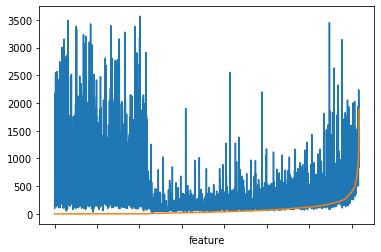

In [15]:
stats.fillna(0).sort_values(["std"])["mean"].plot()
stats.fillna(0).sort_values(["std"])["std"].plot()

In [20]:
error95=stats[["std","count"]].dropna()
error95["err"]=1.95*error95["std"]/np.sqrt(error95["count"])

In [24]:
error95["err"].describe()

count    4992.000000
mean       51.721655
std       154.565538
min         0.000000
25%         2.872799
50%         6.863986
75%        22.448798
max      2609.100000
Name: err, dtype: float64

In [38]:
error95[error95["err"]<=70].describe()

,std,count,err
count,4286.000000,4286.000000,4286.000000
mean,72.551552,582.880775,10.600572
std,74.669450,371.510648,13.519004
min,0.000000,2.000000,0.000000
25%,24.684563,250.000000,2.516817
50%,47.406045,646.000000,5.393921
75%,95.716064,854.000000,11.858599
max,818.404946,1516.000000,69.619825


In [44]:
tricky=stats.loc[error95[error95["err"]>70].index]

In [57]:
tricky.sort_values("count")

,mean,median,std,count,min,max
feature,,,,,,
11100570-52-48.0,919.500000,919.5,338.704148,2,680.0,1159.0
11100520-259-283.0,666.500000,666.5,116.672619,2,584.0,749.0
11100270-251-250.0,1781.500000,1781.5,211.424928,2,1632.0,1931.0
11100520-282-177.0,1065.000000,1065.0,337.997041,2,826.0,1304.0
11100520-551-1426.0,1143.000000,1143.0,794.788022,2,581.0,1705.0
11100270-246-1443.0,447.500000,447.5,492.853426,2,99.0,796.0
11100270-189-250.0,1650.500000,1650.5,316.076731,2,1427.0,1874.0
11100270-189-1225.0,960.000000,960.0,140.007143,2,861.0,1059.0
11100270-178-250.0,1351.500000,1351.5,627.203715,2,908.0,1795.0


In [52]:
stops=pd.read_csv("../data/main/stops.csv")
stops.head()

,BUSSTOP_ID,BUSSTOP_NMMN,GPS_COORDX,GPS_COORDY
0,1,Ангилаг дэлгүүр,106.74209,47.91859
1,2,Орбитын шинэ эцэс,106.72354,47.93694
2,3,Зүүн салааны шинэ эцэс,106.82546,47.99864
3,4,Саппоро,106.85283,47.91256
4,5,Саппоро,106.85171,47.91286


In [59]:
stops[stops["BUSSTOP_ID"].isin([477,872])]

,BUSSTOP_ID,BUSSTOP_NMMN,GPS_COORDX,GPS_COORDY
476,477,10 ШАР БАЙР,107.24594,47.76704
858,872,Содон Төв,107.24850,47.76718


In [2]:
real=pd.read_csv("../data/submission/test.csv",index_col=0)

/home/bilguun/.local/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [8]:
pred=pd.read_csv("../submission/submission1 T 2020-03-24 22:55:30.823044",index_col=0,header=None)

In [5]:
r=real["TIMESTAMP"]

In [10]:
pred["real"]=r

In [16]:
pred.index.name="index"

In [18]:
pred.columns=["TIMESTAMP","real"]

In [21]:
pred[["TIMESTAMP"]].to_csv("../submission/submission1 T 2020-03-24 22:55:30.823044")

In [23]:
pred.shape,1557464

((1557464, 2), 1557464)

In [2]:
files={}
for file in os.listdir("../data/main"):
    print(file)
    files[file]=pd.read_csv("../data/main/"+file,columns=["TIMESTAMP"])

routes.csv


TypeError: parser_f() got an unexpected keyword argument 'columns'

In [2]:
data=pd.read_csv("../data/main/training.csv",index_col=0).sort_values(["BUS_ID","TIMESTAMP"])

/home/bilguun/.local/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [2]:
test=pd.read_csv("../data/main/test.csv",index_col=0)

/home/bilguun/.local/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [6]:
#test data prep
s=pd.DataFrame(test["TIMESTAMP"])

In [9]:
z=pd.isnull(s["TIMESTAMP"]).cumsum()

In [11]:
s["nullCount"]=z

In [16]:
s=s.dropna()

In [19]:
s["TOTALDIFF"]=s["TIMESTAMP"].diff(1)

/home/bilguun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
s["AVERAGEDIFF"]=s["TOTALDIFF"]/s["nullCount"].diff(1)

/home/bilguun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
s=s[~s.isin([np.nan, np.inf, -np.inf]).any(1)].dropna()

In [27]:
s.describe()

,TIMESTAMP,nullCount,TOTALDIFF,AVERAGEDIFF
count,2.505290e+05,2.505290e+05,250529.000000,250529.000000
mean,1.579773e+09,6.003438e+05,991.093618,243.971847
std,1.656566e+05,3.458694e+05,929.918564,179.546946
min,1.579501e+09,1.000000e+00,54.000000,43.250000
25%,1.579627e+09,3.015720e+05,364.000000,137.500000
50%,1.579777e+09,6.028920e+05,680.000000,194.000000
75%,1.579892e+09,9.030370e+05,1290.000000,287.000000
max,1.580081e+09,1.187687e+06,12323.000000,3483.000000


In [62]:
d=diffz[tr["BUS_ID"].diff(-1) == 0]

In [64]:
tr.loc[d.index].shape

(3262, 6)

In [4]:
data["BUSROUTE_ID"].unique()

array([11100010, 11100510, 11100420, 11100690, 11100182, 11100060,
       11100281, 11100270, 11100360, 11100450, 11100020, 11100470,
       11100090, 11100570, 11100612, 11400060, 11100140, 11400070,
       11100150, 11200020, 11100040, 11100290, 11100250, 11100620,
       11100340, 11100300, 11100640, 11100550, 11100172, 11100440,
       11400020, 11100171, 11100030, 11100202, 11400100, 11100530,
       11100212, 11100540, 11400056, 11100280, 11100240, 11100710,
       11400031, 11100201, 11100192, 11100050, 11100400, 11100194,
       11100520, 11100100, 11100223, 11400010, 11100720, 11400112,
       11400120, 11400090, 11100122, 11100600, 11400130, 11100390,
       11100410, 11100160, 11100650, 11100330, 11100310, 11100590,
       11100070, 11100460, 11100490, 11400040, 11100350, 11100191,
       11100730, 11100402, 11400080, 11100130, 11100580, 11100110,
       11100560, 11100430, 11100293, 11100320, 11100230, 11100500,
       11100630, 11100380, 11400110, 11100211, 11100181, 11100

In [7]:
tr=[]
ev=[]
te=[]
for busid in data["BUSROUTE_ID"].unique():
    la=data[data["BUSROUTE_ID"]==busid]
    tr.append(la.iloc[:int(0.8*len(la))])
    ev.append(la.iloc[int(0.8*len(la)):])
    te.append(test[test["BUSROUTE_ID"]==busid])

In [8]:
#os.mkdir("../data/full")
pd.concat(tr).to_csv("../data/full/train.csv")
pd.concat(ev).to_csv("../data/full/eval.csv")
pd.concat(te).to_csv("../data/full/test.csv")

In [6]:
#os.mkdir("../data/submission")
data.to_csv("../data/submission/train.csv")
test.to_csv("../data/submission/test.csv")

In [67]:
a=pd.Series([1,2,3,4,5],index=[1,2,3,4,5])
b=pd.Series([1,2,3,4],index=[3,4,5,6])

In [68]:
a-b

1    NaN
2    NaN
3    2.0
4    2.0
5    2.0
6    NaN
dtype: float64

In [16]:
data["BUS_ID"].unique()

array([     2053,      2058,      2061, ..., 983516012, 983606001,
       985606003])

In [17]:
from sklearn.utils.testing import all_estimators
from sklearn import base

estimators = all_estimators()

for name, class_ in estimators:
    if issubclass(class_, base.RegressorMixin):
        print(name)

ARDRegression
AdaBoostRegressor
BaggingRegressor
BayesianRidge
CCA
DecisionTreeRegressor
ElasticNet
ElasticNetCV
ExtraTreeRegressor
ExtraTreesRegressor
GaussianProcessRegressor
GradientBoostingRegressor
HuberRegressor
KNeighborsRegressor
KernelRidge
Lars
LarsCV
Lasso
LassoCV
LassoLars
LassoLarsCV
LassoLarsIC
LinearRegression
LinearSVR
MLPRegressor
MultiTaskElasticNet
MultiTaskElasticNetCV
MultiTaskLasso
MultiTaskLassoCV
NuSVR
OrthogonalMatchingPursuit
OrthogonalMatchingPursuitCV
PLSCanonical
PLSRegression
PassiveAggressiveRegressor
RANSACRegressor
RadiusNeighborsRegressor
RandomForestRegressor
Ridge
RidgeCV
SGDRegressor
SVR
TheilSenRegressor
TransformedTargetRegressor


In [15]:
!pip3 install pytest

    100% |████████████████████████████████| 256kB 203kB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 1.1MB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/a2/db/4313ab3be961f7a763066401fb77f7748373b6094076ae2bda2806988af6/attrs-19.3.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 92kB 1.2MB/s ta 0:00:011
    100% |████████████████████████████████| 71kB 1.5MB/s ta 0:00:011


In [20]:
a=pd.DataFrame({"a":[1,2,3],"b":[2,3,4]})
b=pd.DataFrame({"a":[1,2,3],"b":[2,3,4]})

In [23]:
pd.concat([a,b],axis=1)

,a,b,a,b
0,1,2,1,2
1,2,3,2,3
2,3,4,3,4


In [72]:
miss_val=test["TIMESTAMP"].isnull()+0

In [73]:
miss_val.describe()

count    1.557464e+06
mean     7.625775e-01
std      4.255034e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: TIMESTAMP, dtype: float64

In [84]:
miss_val.values

array([0, 1, 0, ..., 1, 1, 0])

In [95]:
x=data["TIMESTAMP"][:100]

In [93]:
x.iloc[np.where(miss_val.values[:100])]=np.nan

In [98]:
for i, v in x.iteritems():
    print(i,v)

173467 1578330214
1624542 1578900505
1625151 1578900622
1625791 1578900745
1626425 1578900866
1627161 1578901002
1628090 1578901176
1628653 1578901282
1629874 1578901506
1630675 1578901650
1631768 1578901849
1632383 1578901968
1633977 1578902262
1635040 1578902457
1635362 1578902512
1636166 1578902659
1637354 1578902873
1638013 1578902991
1638414 1578903064
1638825 1578903142
1639611 1578903288
1640478 1578903448
1903298 1578994153
2135720 1579074723
1888458 1578991454
1888579 1578991476
1888971 1578991553
1889483 1578991652
1892099 1578992125
1892597 1578992217
1893899 1578992447
1894673 1578992581
1895247 1578992685
1896626 1578992933
1897036 1578993009
2816644 1579279101
2817356 1579279253
2818801 1579279560
2820010 1579279832
159011 1578326805
159502 1578326925
160153 1578327071
160665 1578327195
161461 1578327374
162335 1578327591
165757 1578328406
166458 1578328579
169182 1578329213
169958 1578329396
170347 1578329491
171025 1578329651
171607 1578329783
171985 1578329874
172424 1